In [177]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection

In [178]:
path = Path("../Images_Transformed_565_160_120")
with open(path/'data.npy', 'rb') as d, open(path/"labels.npy", "rb") as l, open(path/"classes.npy", "rb") as c:
    data = np.load(d)
    labels = np.load(l)
    classes = np.load(c)
le = LabelEncoder()
le.classes_ = classes

In [179]:
print(labels.shape)
print(data.shape)
print(classes)

(105,)
(105, 120, 160, 3)
['Maria' 'Nikhil' 'Simon']


In [180]:
from collections import Counter
print(Counter(labels))

Counter({2: 49, 0: 45, 1: 11})


In [181]:
# Helper functions
def _565_channels_normalize(data: np.ndarray) -> np.ndarray:
    width, height, chan = data.shape
    channels = np.zeros(shape=(width, height, chan), dtype=np.float16)

    for x in range(width):
        for y in range(height):
            channels[x, y, 0] = data[x, y, 0] / 32
            channels[x, y, 1] = data[x, y, 1] / 64
            channels[x, y, 2] = data[x, y, 2] / 32

    return channels

# If we want to reverse the normalization -> 888
def normalized_to_888(data: np.ndarray) -> np.ndarray:
    width, height, chan = data.shape
    channels = np.zeros(shape=(width, height, chan), dtype=np.uint16)

    for x in range(width):
        for y in range(height):
            channels[x, y, 0] = data[x, y, 0] * 255
            channels[x, y, 1] = data[x, y, 1] * 255
            channels[x, y, 2] = data[x, y, 2] * 255

    return channels

In [182]:
# Normalize 565 channels
unscaled_data = data


data = []
for img in unscaled_data:
    data.append(_565_channels_normalize(img))
data = np.array(data)


In [183]:
train_data, validation_data, train_labels, validation_labels = model_selection.train_test_split(data,labels, random_state=50,test_size=0.3)
validation_data, test_data, validation_labels, test_labels = model_selection.train_test_split(validation_data,validation_labels, random_state=50,test_size=0.3)

print('train data shape:',np.shape(train_data))
print('validation data shape:',np.shape(validation_data))
print('train labels shape:',np.shape(train_labels))
print('validation labels shape:',np.shape(validation_labels))
print('test labels shape:',np.shape(test_data))
print('test labels shape:',np.shape(test_labels))

train data shape: (73, 120, 160, 3)
validation data shape: (22, 120, 160, 3)
train labels shape: (73,)
validation labels shape: (22,)
test labels shape: (10, 120, 160, 3)
test labels shape: (10,)


In [184]:
mean = np.mean(train_data, axis = 0)
std = np.std(train_data, axis = 0)

#train_data = (train_data-mean) / std
#validation_data = (validation_data-mean) / std

print(train_data)

[[[[0.9375 0.9375 0.9375]
   [0.9375 0.9375 0.9375]
   [0.875  0.8906 0.9062]
   ...
   [0.5625 0.4375 0.375 ]
   [0.5312 0.4375 0.375 ]
   [0.5625 0.4844 0.3438]]

  [[0.9375 0.9375 0.9375]
   [0.9375 0.9375 0.9375]
   [0.875  0.875  0.9062]
   ...
   [0.5625 0.4219 0.2812]
   [0.5312 0.4219 0.3125]
   [0.5625 0.4688 0.3125]]

  [[0.9375 0.9375 0.9375]
   [0.9375 0.9375 0.9375]
   [0.875  0.8906 0.9062]
   ...
   [0.5625 0.4531 0.3438]
   [0.5312 0.4219 0.3125]
   [0.5625 0.4844 0.3125]]

  ...

  [[0.5625 0.9375 0.9375]
   [0.5625 0.9375 0.9375]
   [0.5312 0.922  0.9375]
   ...
   [0.5312 0.4375 0.2812]
   [0.7188 0.6562 0.5   ]
   [0.7812 0.703  0.5312]]

  [[0.5625 0.9375 0.9375]
   [0.5625 0.9375 0.9375]
   [0.5312 0.922  0.9375]
   ...
   [0.5312 0.4375 0.2812]
   [0.7188 0.6406 0.5   ]
   [0.7812 0.7188 0.5312]]

  [[0.5625 0.9375 0.9375]
   [0.5625 0.9375 0.9375]
   [0.5312 0.922  0.9375]
   ...
   [0.5    0.4375 0.2812]
   [0.7188 0.6562 0.5   ]
   [0.8125 0.703  0.5312]]]


 

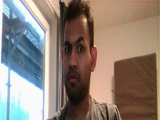

In [185]:
keras.utils.array_to_img(train_data[0])

In [186]:
classes_txt = classes
classes = len(le.classes_)
classes

3

In [187]:
import gc
gc.collect() # used to clear gpu memory (in theory lol)

9399

In [188]:
# This model is too complicated, see further down for the model which is in progress

model = keras.models.Sequential([
    keras.layers.Input(shape=train_data.shape[1:]),
    #keras.layers.MaxPool2D((2,2), input_shape=train_data.shape[1:]),
    keras.layers.Conv2D(8, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(16, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    #keras.layers.Conv2D(128, (3,3), activation="relu"),
    #keras.layers.MaxPool2D((2,2)),
    #keras.layers.Conv2D(256, (3,3), activation="relu"),
    #keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(70, activation="relu"),
    keras.layers.Dense(classes, activation="softmax")
    ])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()



Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 118, 158, 8)       224       
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 59, 79, 8)        0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 59, 79, 8)         0         
                                                                 
 conv2d_67 (Conv2D)          (None, 57, 77, 16)        1168      
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 28, 38, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 26, 36, 32)      

In [189]:
#callback = keras.callbacks.EarlyStopping(monitor="loss", verbose=1, patience=10, min_delta=0.0001, mode="auto")
history = model.fit(train_data, train_labels, validation_data=(validation_data, validation_labels), batch_size=32, epochs=50)#, callbacks=[callback])

Epoch 1/50
3/3 [==============================] - 1s 119ms/step - loss: 1.0413 - accuracy: 0.4384 - val_loss: 0.9505 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 0s 64ms/step - loss: 1.0118 - accuracy: 0.4658 - val_loss: 0.9073 - val_accuracy: 0.5455
Epoch 3/50
3/3 [==============================] - 0s 63ms/step - loss: 0.8953 - accuracy: 0.6438 - val_loss: 0.9538 - val_accuracy: 0.7273
Epoch 4/50
3/3 [==============================] - 0s 65ms/step - loss: 0.8943 - accuracy: 0.5890 - val_loss: 0.9450 - val_accuracy: 0.7727
Epoch 5/50
3/3 [==============================] - 0s 64ms/step - loss: 0.7920 - accuracy: 0.7260 - val_loss: 0.8608 - val_accuracy: 0.7727
Epoch 6/50
3/3 [==============================] - 0s 65ms/step - loss: 0.7314 - accuracy: 0.6712 - val_loss: 0.7480 - val_accuracy: 0.9545
Epoch 7/50
3/3 [==============================] - 0s 70ms/step - loss: 0.6378 - accuracy: 0.7123 - val_loss: 0.6915 - val_accuracy: 0.7727
Epoch 8/50
3/3 [==========

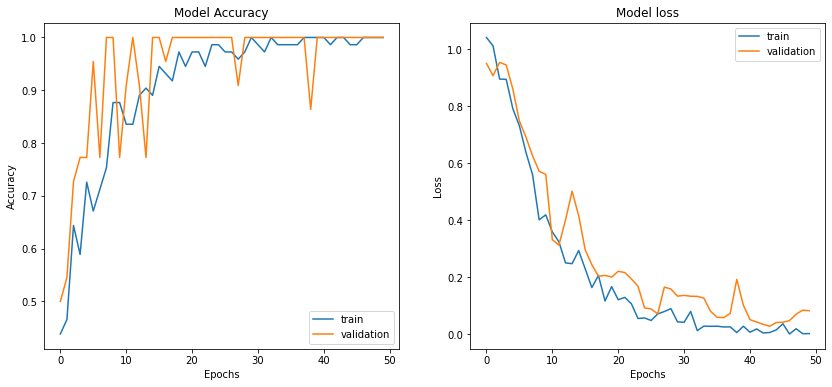

In [190]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="validation")
plt.legend()

In [191]:
#model.save("model_122k")

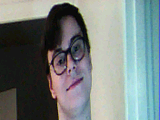

In [192]:
keras.utils.array_to_img(validation_data[0])

In [193]:
img_axis = validation_data[0][None,:,:,:]
img_axis.shape

(1, 120, 160, 3)

In [194]:
pred = model.predict(img_axis)
with np.printoptions(precision=2, suppress=True):
    print(pred)
le.inverse_transform([np.argmax(pred)])

[[0. 0. 1.]]


array(['Simon'], dtype='<U6')

In [195]:
model_45k = keras.models.Sequential([
    keras.layers.Input(shape=train_data.shape[1:]),
    keras.layers.MaxPool2D((2,2), input_shape=train_data.shape[1:]),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(16, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(classes, activation="softmax")
    ])

model_45k.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_45k.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_76 (MaxPoolin  (None, 60, 80, 3)        0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 60, 80, 3)         0         
                                                                 
 conv2d_70 (Conv2D)          (None, 58, 78, 16)        448       
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 29, 39, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 27, 37, 32)        4640      
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 13, 18, 32)     

In [196]:
history_45k = model_45k.fit(train_data, train_labels, validation_data=(validation_data, validation_labels), batch_size=32, epochs=50)#, callbacks=[callback])

Epoch 1/50
3/3 [==============================] - 1s 83ms/step - loss: 1.0693 - accuracy: 0.3425 - val_loss: 0.9903 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 0s 35ms/step - loss: 0.9835 - accuracy: 0.5479 - val_loss: 0.9382 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 0s 30ms/step - loss: 0.9680 - accuracy: 0.4658 - val_loss: 0.9581 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 0s 30ms/step - loss: 0.9287 - accuracy: 0.5753 - val_loss: 0.9533 - val_accuracy: 0.9545
Epoch 5/50
3/3 [==============================] - 0s 31ms/step - loss: 0.8844 - accuracy: 0.6986 - val_loss: 0.8976 - val_accuracy: 0.8636
Epoch 6/50
3/3 [==============================] - 0s 30ms/step - loss: 0.8315 - accuracy: 0.6438 - val_loss: 0.8778 - val_accuracy: 0.7273
Epoch 7/50
3/3 [==============================] - 0s 35ms/step - loss: 0.7788 - accuracy: 0.6301 - val_loss: 0.8517 - val_accuracy: 0.7273
Epoch 8/50
3/3 [===========

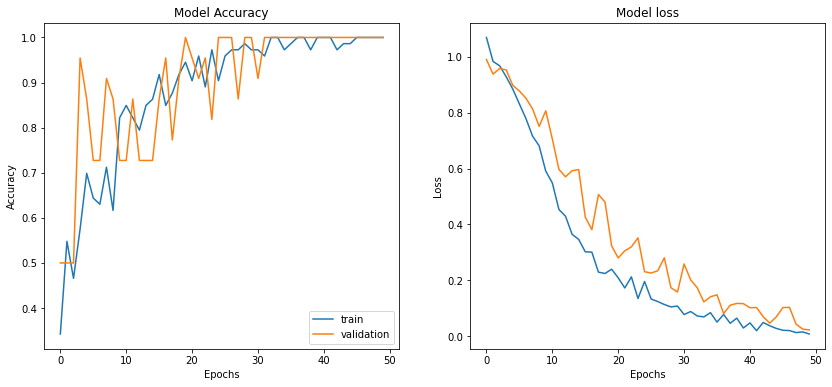

In [197]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history_45k.history['accuracy'], label='train')
plt.plot(history_45k.history['val_accuracy'], label='validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(history_45k.history['loss'], label="train")
plt.plot(history_45k.history['val_loss'], label="validation")

In [198]:
#model_45k.save("model_45k")

# The FINAL model
Below is the model which will be used in the Final product. Please try to increase the score.

In [199]:
model_final = keras.models.Sequential([
    keras.layers.Input(shape=train_data.shape[1:]),
    #keras.layers.MaxPool2D((2,2), input_shape=train_data.shape[1:]),
    #keras.layers.Dropout(0.5),
    keras.layers.Conv2D(8, (3,3), activation="relu"),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Conv2D(16, (2,2), activation="relu"),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Conv2D(8, (3,3), activation="relu"),
    keras.layers.MaxPool2D((3,3)),
    #keras.layers.Conv2D(32, (3,3), activation="relu"),
    #keras.layers.MaxPool2D((2,2)),
    #keras.layers.Conv2D(32, (3,3), activation="relu"),
    #keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dropout(0.5),

    ## Dynamic
    keras.layers.Dense(35, activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(classes, activation="softmax")
    ])

model_final.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_final.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 118, 158, 8)       224       
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 39, 52, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_75 (Conv2D)          (None, 38, 51, 16)        528       
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 12, 17, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 10, 15, 8)         1160      
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 3, 5, 8)        

In [200]:
history_final = model_final.fit(train_data, train_labels, validation_data=(validation_data, validation_labels), batch_size=32, epochs=50)#, callbacks=[callback])

Epoch 1/50
3/3 [==============================] - 1s 94ms/step - loss: 1.0994 - accuracy: 0.3699 - val_loss: 1.0737 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 0s 42ms/step - loss: 1.0829 - accuracy: 0.4384 - val_loss: 1.0570 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 0s 47ms/step - loss: 1.0708 - accuracy: 0.5342 - val_loss: 1.0318 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 0s 46ms/step - loss: 1.0477 - accuracy: 0.5068 - val_loss: 1.0014 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 0s 45ms/step - loss: 1.0282 - accuracy: 0.5068 - val_loss: 0.9567 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 0s 42ms/step - loss: 1.0052 - accuracy: 0.5068 - val_loss: 0.8994 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 0s 43ms/step - loss: 0.9605 - accuracy: 0.6164 - val_loss: 0.8230 - val_accuracy: 0.8636
Epoch 8/50
3/3 [===========

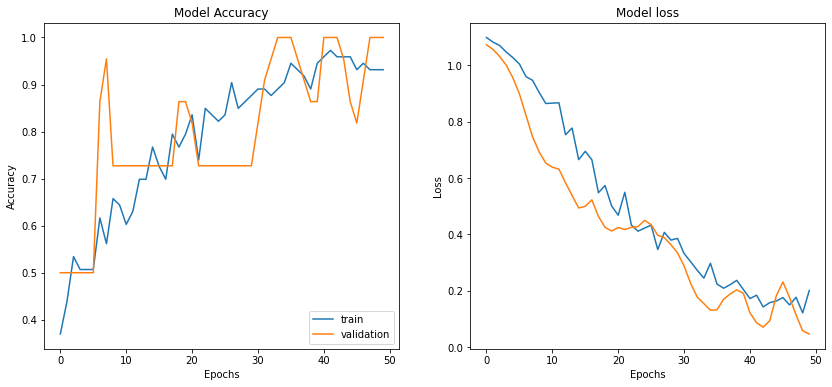

In [201]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history_final.history['accuracy'], label='train')
plt.plot(history_final.history['val_accuracy'], label='validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(history_final.history['loss'], label="train")
plt.plot(history_final.history['val_loss'], label="validation")

Test acc: 0.9
Is: Maria but was predicted as: Simon


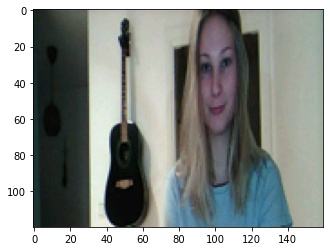

In [202]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_class = model_final.predict(test_data)
y_pred_class = np.argmax(np.array(y_pred_class), axis=1)

y_diff = y_pred_class != test_labels
print("Test acc:", 1 - y_diff.sum() / len(y_diff))

y_pred_txt = []
y_true_txt = []

for i in range(len(test_labels)):
    y_pred_txt.append(classes_txt[y_pred_class[i]])
    y_true_txt.append(classes_txt[test_labels[i]])

for i in range(len(y_diff)):
    if y_diff[i]:
        plt.imshow(keras.utils.array_to_img(test_data[i]))
        print("Is:", y_true_txt[i], "but was predicted as:", y_pred_txt[i])

# Fix CNN weights and train only DNN (dynamic weights)